# **Problem Statement:** Develop a Machine Learning model for estimating the milk quality

# Importing the dataset

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#'pandas' library for working with data sheets
import pandas as pd
import numpy as np

#Reading the .csv file
dataFrame = pd.read_csv("/content/drive/MyDrive/SEM 4/MLP/OE/MLP_OE_B2/4_MilkQuality.csv")

#Dispalying the Data FRame
dataFrame.info()
dataFrame.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [ ]:
#Cleaning the dataset

#print('Checking if there are null values present in the dataframe\n',dataFrame.isnull())
print('Checking if there are null values present in the dataframe: \n');
phNULL = dataFrame[dataFrame['pH'].isnull()]
print("\nPh:")
print(phNULL)
tempNULL = dataFrame[dataFrame['Temprature'].isnull()]
print("\nTemperature:")
print(tempNULL)
odorNULL = dataFrame[dataFrame['Odor'].isnull()]
print("\nOdor:")
print(odorNULL)
turNULL = dataFrame[dataFrame['Turbidity'].isnull()]
print("\nTurbidity:")
print(turNULL)
tasteNULL = dataFrame[dataFrame['Taste'].isnull()]
print("\nTaste:")
print(tasteNULL)
colourNULL = dataFrame[dataFrame['Colour'].isnull()]
print("\nColour:")
print(colourNULL)
gradeNULL = dataFrame[dataFrame['Grade'].isnull()]
print("\nGrade:")
print(gradeNULL)

Checking if there are null values present in the dataframe: 


Ph:
Empty DataFrame
Columns: [pH, Temprature, Taste, Odor, Fat , Turbidity, Colour, Grade]
Index: []

Temperature:
Empty DataFrame
Columns: [pH, Temprature, Taste, Odor, Fat , Turbidity, Colour, Grade]
Index: []

Odor:
Empty DataFrame
Columns: [pH, Temprature, Taste, Odor, Fat , Turbidity, Colour, Grade]
Index: []

Turbidity:
Empty DataFrame
Columns: [pH, Temprature, Taste, Odor, Fat , Turbidity, Colour, Grade]
Index: []

Taste:
Empty DataFrame
Columns: [pH, Temprature, Taste, Odor, Fat , Turbidity, Colour, Grade]
Index: []

Colour:
Empty DataFrame
Columns: [pH, Temprature, Taste, Odor, Fat , Turbidity, Colour, Grade]
Index: []

Grade:
Empty DataFrame
Columns: [pH, Temprature, Taste, Odor, Fat , Turbidity, Colour, Grade]
Index: []


# Data visualisation

In [ ]:
#'matplotlib' library for working with data visulization methods (plots)
import matplotlib.pyplot as plt
#'Seaborn' library for making statistical graphics in Python
import seaborn as sb

#counts occurence of unique value in grade column
counts = dataFrame['Grade'].value_counts()
#100 for count in counts] #calculates percentage of particular grades
grade_percentages =  [(count/len(dataFrame))*100 for count in counts]
 #extracting the unique values in counts using the index attribute of the
#counts Series, and converting them to a list using the tolist() method
grade_label = counts.index.tolist()

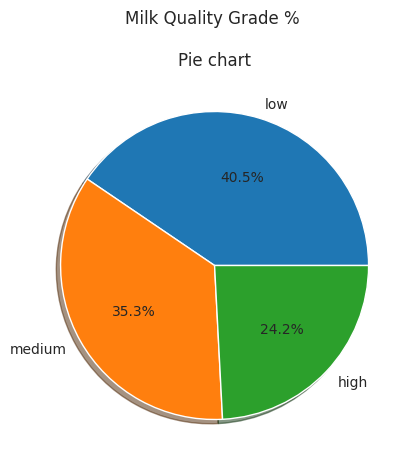

In [ ]:
#Pie chart
# change the default style of the plot to a darker theme.
sb.set_style('dark')
#width and height of 5 inches.
plt.figure(figsize=(5,5))
plt.title('Milk Quality Grade %')
 #grade_percentages: a list of floats representing the percentage of occurrences of each grade.
   #autopct='%1.1f%%': a string specifying the format for the percentage labels on the chart.
plt.pie(grade_percentages, labels=grade_label, autopct='%1.1f%%',shadow=True);
plt.title('Milk Quality Grade % \n\nPie chart')
plt.show()



#Data processing

In [ ]:
#Checking the co-relation
dataFrame['Grade'] = dataFrame['Grade'].map({'high': 1, 'medium': 0, 'low': -1})
print('Correlation: ')
print(dataFrame.corr())

Correlation: 
                  pH  Temprature     Taste      Odor      Fat   Turbidity  \
pH          1.000000    0.244684 -0.064053 -0.081331 -0.093429   0.048384   
Temprature  0.244684    1.000000 -0.109792 -0.048870  0.024073   0.185106   
Taste      -0.064053   -0.109792  1.000000  0.017582  0.324149   0.055755   
Odor       -0.081331   -0.048870  0.017582  1.000000  0.314505   0.457935   
Fat        -0.093429    0.024073  0.324149  0.314505  1.000000   0.329264   
Turbidity   0.048384    0.185106  0.055755  0.457935  0.329264   1.000000   
Colour     -0.164565   -0.008511 -0.082654 -0.039361  0.114151   0.136436   
Grade       0.028980   -0.417789  0.025500  0.149626  0.151002  -0.153634   

              Colour     Grade  
pH         -0.164565  0.028980  
Temprature -0.008511 -0.417789  
Taste      -0.082654  0.025500  
Odor       -0.039361  0.149626  
Fat         0.114151  0.151002  
Turbidity   0.136436 -0.153634  
Colour      1.000000 -0.056986  
Grade      -0.056986  1.0000


Grade has highest corelation with temperature

In [ ]:
#'Scikit-learn' library includes mathematical, statistical and general purpose algorithms
from sklearn.preprocessing import StandardScaler

#Normalizing data present in the column ph temperature and Color
ScalingFeatures = dataFrame.iloc[:, [0,1,6]]
print(ScalingFeatures)

       pH  Temprature  Colour
0     6.6          35     254
1     6.6          36     253
2     8.5          70     246
3     9.5          34     255
4     6.6          37     255
...   ...         ...     ...
1054  6.7          45     247
1055  6.7          38     255
1056  3.0          40     255
1057  6.8          43     250
1058  8.6          55     255

[1059 rows x 3 columns]


In [ ]:
#Scaling the features
Scaler = StandardScaler()
Scaled = Scaler.fit_transform(ScalingFeatures)
print(Scaled)

[[-0.02153136 -0.91410734  0.5016002 ]
 [-0.02153136 -0.81503461  0.26933321]
 [ 1.33656414  2.55343832 -1.35653574]
 ...
 [-2.59476494 -0.41874368  0.73386719]
 [ 0.12142606 -0.12152548 -0.42746777]
 [ 1.40804285  1.06734732  0.73386719]]


In [ ]:
#Creating a new dataframe with the scaled features
dataFrame.insert(1, "NewPH", Scaled[:,0], True)
dataFrame.insert(3, "NewTemp", Scaled[:,1], True)
dataFrame.insert(9, "NewColor", Scaled[:,2], True)
dataFrame.info()
#print(dataFrame)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   NewPH       1059 non-null   float64
 2   Temprature  1059 non-null   int64  
 3   NewTemp     1059 non-null   float64
 4   Taste       1059 non-null   int64  
 5   Odor        1059 non-null   int64  
 6   Fat         1059 non-null   int64  
 7   Turbidity   1059 non-null   int64  
 8   Colour      1059 non-null   int64  
 9   NewColor    1059 non-null   float64
 10  Grade       1059 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 91.1 KB


Selecting the features and target and spliting the dataset.
Non scaled data is used

In [ ]:
#Selecting the features and target
#spliting the dataset
from sklearn.model_selection import train_test_split
features_NS = dataFrame.iloc[:, [0,2,4,5,6,7,8]]
target = dataFrame['Grade']
[xtrain_NS, xtest_NS, ytrain_NS, ytest_NS] = train_test_split(features_NS,target, test_size = 0.3)

Selecting the features and target and spliting the dataset.
Scaled data is used

In [ ]:
features_S = dataFrame.iloc[:, [1,3,4,5,6,7,9]]
target = dataFrame['Grade']
[xtrain_S, xtest_S, ytrain_S, ytest_S] = train_test_split(features_S,target, test_size = 0.3)

# Selecting the model, Training and testing the model, Evaluating the model

# Navie Bayes

Using non scaled features

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Select the model
NB_NS = GaussianNB()
NB_NS.fit(xtrain_NS, ytrain_NS)
#Training the model
NB_NS.fit(xtrain_NS,ytrain_NS)
#Testing the model
ypred_NS1=NB_NS.predict(xtest_NS)
#Predicting the values
print('Predicted values:')
print(ypred_NS1)

Predicted values:
[ 1  1 -1  1  0 -1  0  1 -1  0  0  1  0 -1  0  0  1  1  0 -1  0  1 -1  0
  0  0  0 -1  0  0 -1  1  0 -1 -1 -1  0 -1  1 -1  0 -1  0  0 -1  1  0  0
  0  0  1  0  1 -1  1  0 -1  1  1  0  1 -1 -1  0  0  1  0  1  1 -1  1 -1
  0 -1 -1  0 -1 -1 -1  0  0  1  1 -1 -1  0  0  1  0 -1  1  1  1 -1  0 -1
  1  0  1 -1  0  0 -1  1 -1  1  0  0  1  0  0  0 -1  0  1  0  0  0 -1  0
  1  0 -1  1 -1  0  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  0  0 -1  0  1
  0  0  1  1  0  1  1 -1  0 -1  0  0  0 -1  1 -1 -1  0  0 -1  1  1  1 -1
  0  1  0  1  1 -1  0  0 -1  0  1 -1  0 -1  1  1  0 -1 -1 -1  0  1  1 -1
  0  0 -1  1  0  1  0  1  0  0  0  0 -1 -1  0 -1  1  1 -1  1  0 -1  1 -1
  1 -1 -1  1 -1 -1  0 -1 -1  1 -1 -1  0 -1  0  0 -1 -1  0 -1  0  0 -1 -1
  0  1 -1 -1  0  0  0  1  1  0  0  1 -1  1 -1  0  1 -1 -1  1  0  1 -1  1
  0  1  0  0  0  0 -1 -1  1  1  0  0  0 -1  0  0 -1  1  1  0  0  0 -1 -1
 -1  0 -1  1 -1 -1  0  0 -1 -1  0 -1  0 -1 -1  0 -1 -1 -1  0 -1 -1 -1  1
 -1  0  1  0 -1 -1]


In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
#Evaluate model Parameters
NB_NS.score(xtest_NS,ytest_NS)
confmat_NS1=confusion_matrix(ytest_NS,ypred_NS1)
print("Confusion matrix: ")
print(confmat_NS1)
print("\nClassfication report:")
print(classification_report(ytest_NS,ypred_NS1))
a_NS = accuracy_score(ytest_NS,ypred_NS1)
print("\nAccuracy of the model when the scaled features are not used is ",a_NS)

Confusion matrix: 
[[114   5   5]
 [  0 106   6]
 [  0   9  73]]

Classfication report:
              precision    recall  f1-score   support

          -1       1.00      0.92      0.96       124
           0       0.88      0.95      0.91       112
           1       0.87      0.89      0.88        82

    accuracy                           0.92       318
   macro avg       0.92      0.92      0.92       318
weighted avg       0.93      0.92      0.92       318


Accuracy of the model when the scaled features are not used is  0.9213836477987422


Using scaled features

In [ ]:
#Select the model
NB_S = GaussianNB()
NB_S.fit(xtrain_S, ytrain_S)
#Training the model
NB_S.fit(xtrain_S,ytrain_S)
#Testing the model
ypred_S1=NB_S.predict(xtest_S)
#Predicting the values
print('Predicted values:')
print(ypred_S1)

Predicted values:
[ 1  0  0  0  0  1  0  0  1 -1  0  0 -1  0  1  0  0  1  1  0 -1 -1 -1  0
 -1  0 -1 -1  1  0 -1  1  0  0  1 -1  1  0  0 -1  0  1  0  1  1  1 -1 -1
  1  0  0 -1 -1  0  0 -1  0  0 -1  0 -1  1  0  0  0  1  0  0  0 -1  0 -1
  0  0 -1 -1  1  1  1  1 -1 -1  0  1 -1  0 -1 -1  0  0 -1 -1 -1  1  0 -1
  0 -1 -1  0 -1  0 -1  0  1  0  0  0 -1  0 -1  0 -1  1  1  0  1 -1  1  0
  1  0  1 -1  0  1  1 -1  1 -1  1 -1  0  1  1  1  0  1  0 -1 -1  1  1  0
  0  0  1 -1  0  0 -1  0 -1 -1 -1  1  0 -1  1  0  1  1 -1 -1  0  0  0  0
  1  0 -1  0  1  1  0 -1  1  1  1  0  0 -1  0 -1 -1  0 -1 -1  1 -1  0 -1
 -1  1  0  1 -1  0  0  1  1  0  1 -1  1  1  1 -1  1  0  0  0  0  0  0 -1
  0  1  0  1 -1 -1  1  1 -1  0  1  0  0 -1  1 -1  0  0 -1  0 -1 -1  1  1
 -1 -1  0  0  1  1 -1  0 -1 -1  1  0 -1  1 -1  0 -1  0 -1 -1  0  1 -1  1
  0 -1  1 -1 -1 -1  1  1 -1  1  0 -1  0 -1 -1 -1 -1  1  1  1  1  1  1  0
  0  0  1 -1 -1  1 -1  0 -1 -1  0 -1  1  0 -1  0  0 -1  1  0  1 -1  1  0
 -1  0  1 -1 -1 -1]


In [ ]:
#Evaluate model Parameters
NB_S.score(xtest_S,ytest_S)
confmat_S1=confusion_matrix(ytest_S,ypred_S1)
print("Confusion matrix: ")
print(confmat_S1)
print("\nClassfication report:")
print(classification_report(ytest_S,ypred_S1))
a_S= accuracy_score(ytest_S,ypred_S1)
print("\nAccuracy of the model when the scaled features are not used is ",a_S)

Confusion matrix: 
[[109   4   4]
 [  0 113   8]
 [  0   0  80]]

Classfication report:
              precision    recall  f1-score   support

          -1       1.00      0.93      0.96       117
           0       0.97      0.93      0.95       121
           1       0.87      1.00      0.93        80

    accuracy                           0.95       318
   macro avg       0.95      0.96      0.95       318
weighted avg       0.95      0.95      0.95       318


Accuracy of the model when the scaled features are not used is  0.949685534591195


# Decision Tree

using non scaled features

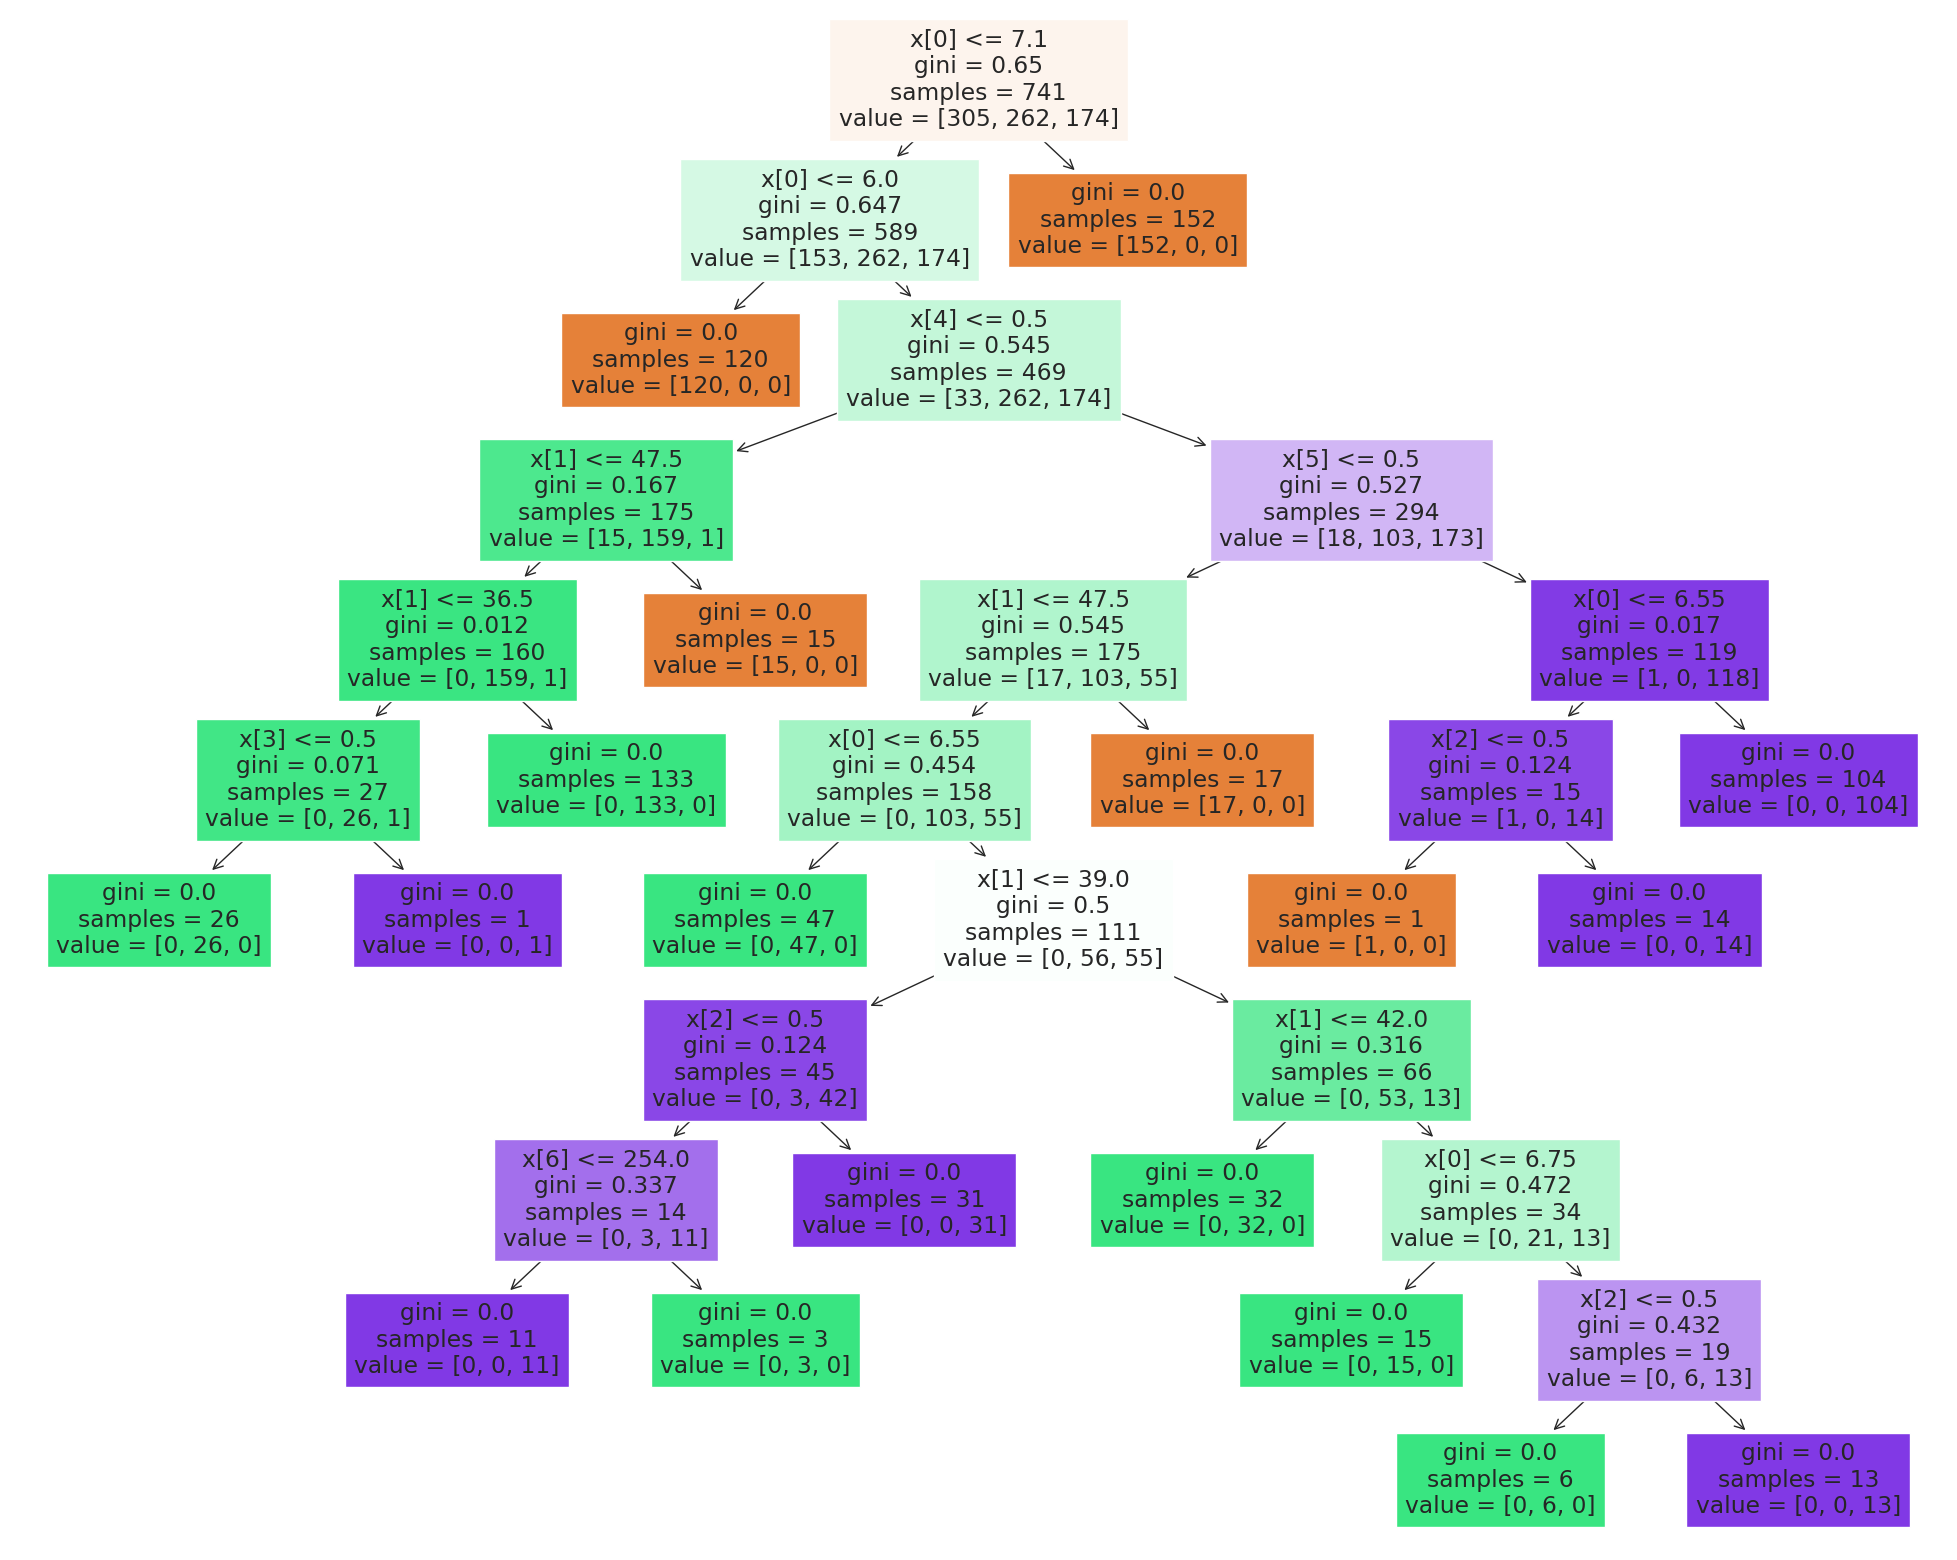

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Using the Decision Tree Classifier
DT_NS = DecisionTreeClassifier()
# Training the model
DT_NS.fit(xtrain_NS,ytrain_NS)
# Predicting the values
ypred_NS2 = DT_NS.predict(xtest_NS)
# Plotting the Tree
fig = plt.figure(figsize=(25,20))
figure1 = tree.plot_tree(DT_NS,filled=True)

In [ ]:
#Evaluate the model
DT_NS.score(xtest_NS,ytest_NS)
confmat_NS2=confusion_matrix(ytest_NS,ypred_NS2)
print("Confusion matrix: ")
print(confmat_NS2)
print("Classfication report:")
print(classification_report(ytest_NS,ypred_NS2))
b_NS= accuracy_score(ytest_NS,ypred_NS2)
print('Accuracy of model using decision tree when non scaled features are used is ',b_NS)

Confusion matrix: 
[[123   1   0]
 [  0 111   1]
 [  0   2  80]]
Classfication report:
              precision    recall  f1-score   support

          -1       1.00      0.99      1.00       124
           0       0.97      0.99      0.98       112
           1       0.99      0.98      0.98        82

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318

Accuracy of model using decision tree when non scaled features are used is  0.9874213836477987


Using scaled features

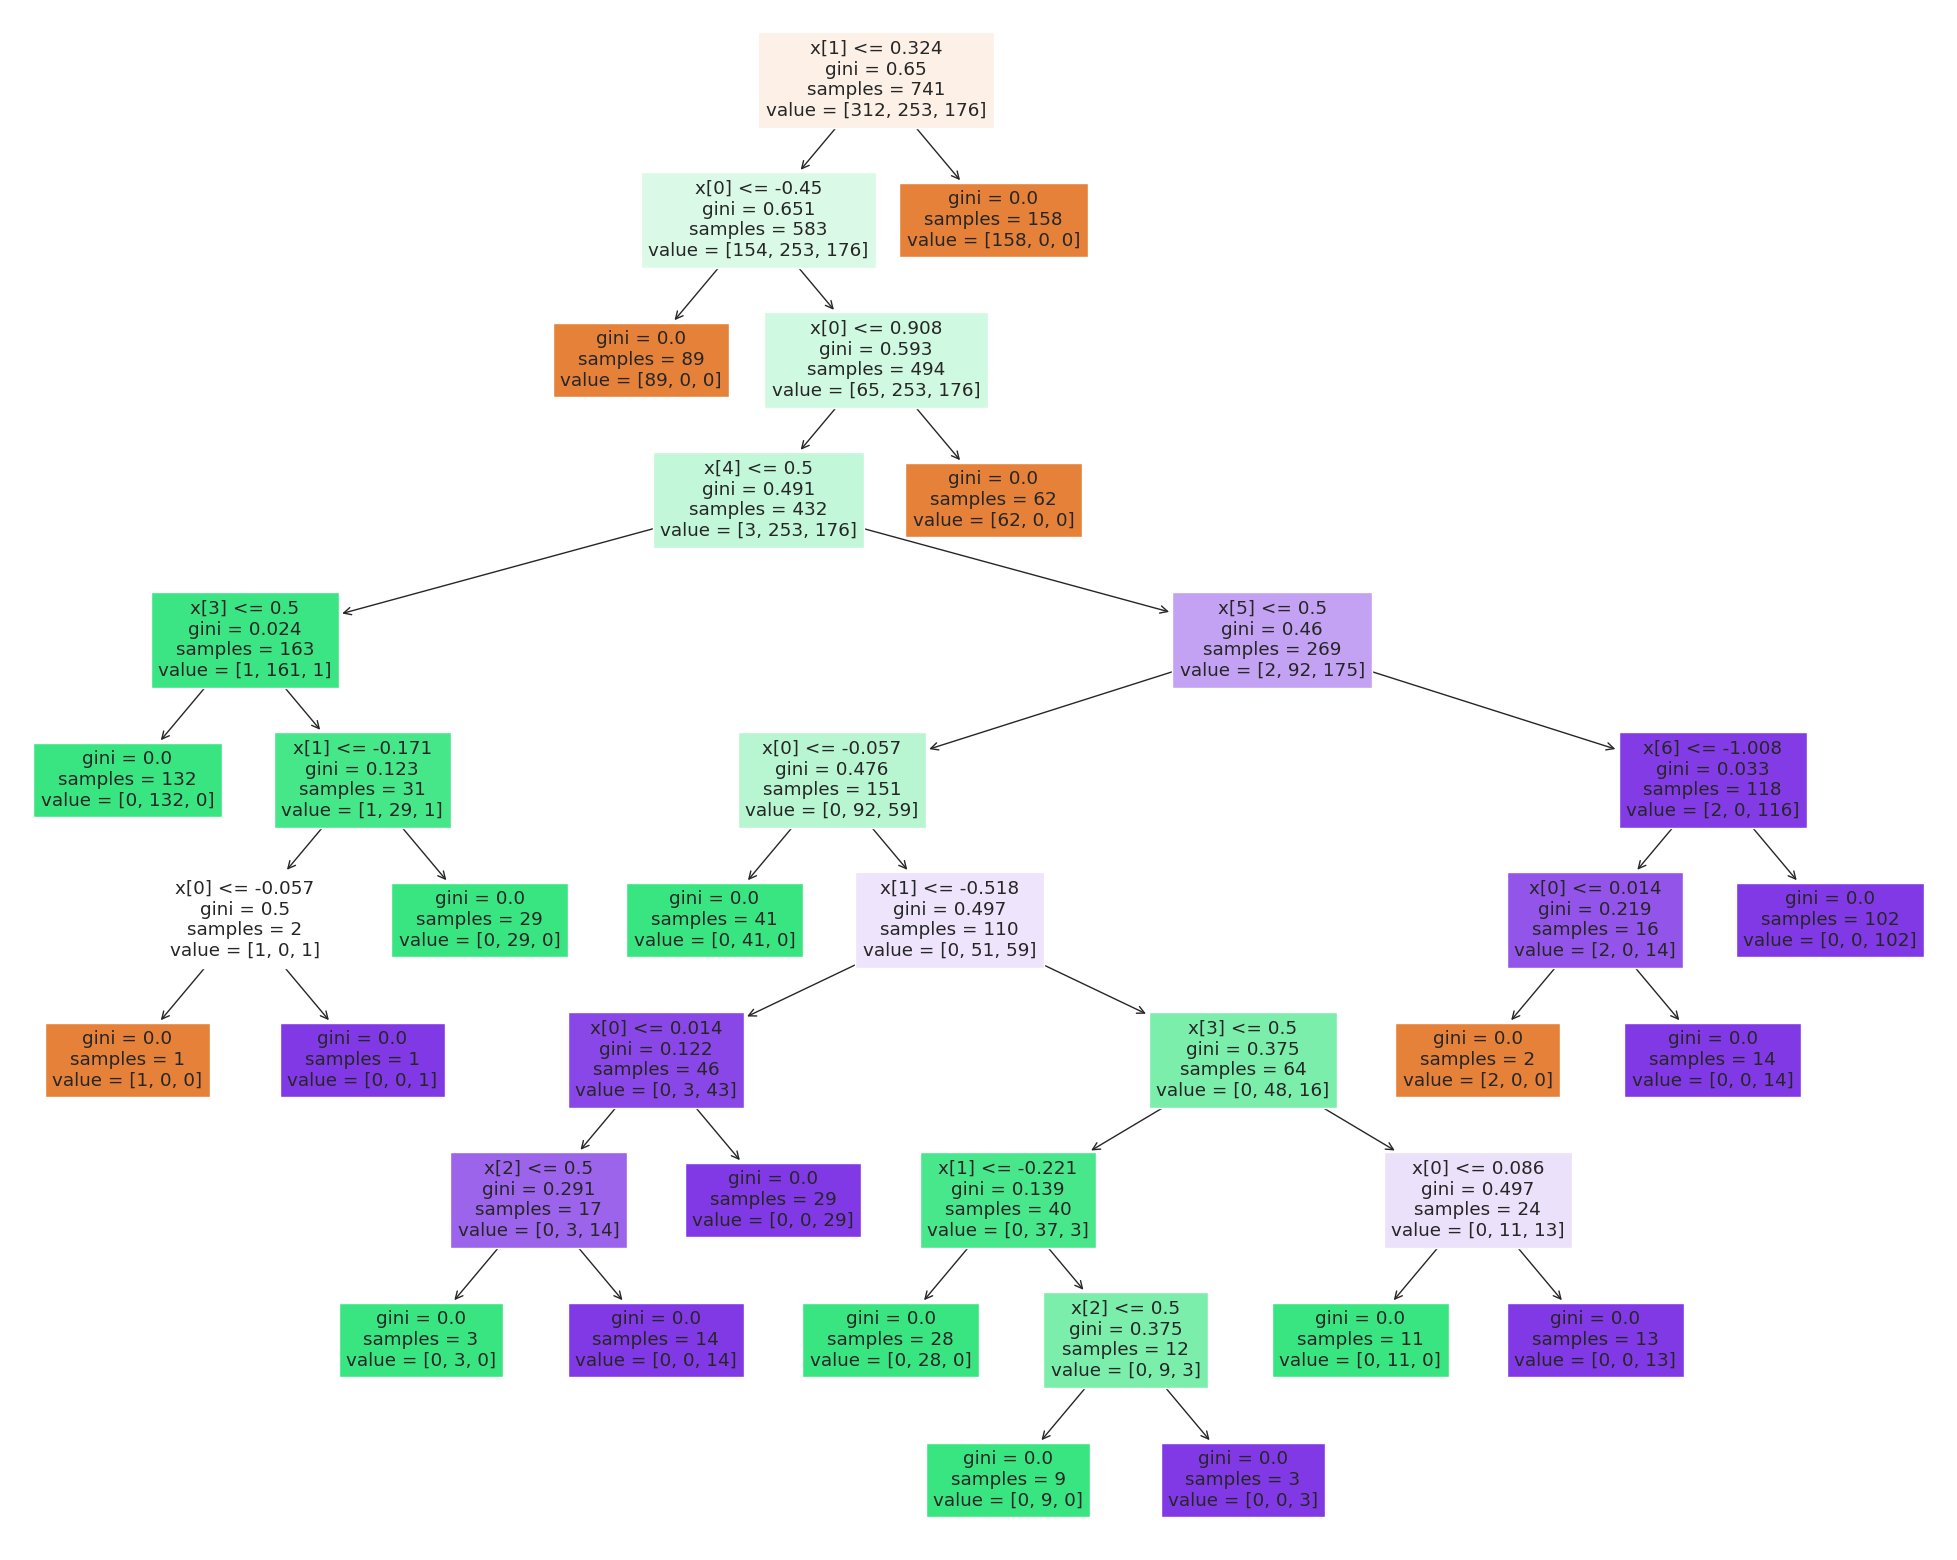

In [ ]:
# Using the Decision Tree Classifier
DT_S = DecisionTreeClassifier()
# Training the model
DT_S.fit(xtrain_S,ytrain_S)
# Predicting the values
ypred_S2= DT_S.predict(xtest_S)
# Plotting the Tree
fig = plt.figure(figsize=(25,20))
figure2 = tree.plot_tree(DT_S,filled=True)

In [ ]:
#Evaluate the model
DT_S.score(xtest_S,ytest_S)
confmat_S2=confusion_matrix(ytest_S,ypred_S2)
print("Confusion matrix: ")
print(confmat_S2)
print("Classfication report:")
print(classification_report(ytest_S,ypred_S2))
b_S = accuracy_score(ytest_S,ypred_S2)
print('Accuracy of model using decision tree when scaled features are used is ',b_S)

Confusion matrix: 
[[117   0   0]
 [  0 120   1]
 [  1   1  78]]
Classfication report:
              precision    recall  f1-score   support

          -1       0.99      1.00      1.00       117
           0       0.99      0.99      0.99       121
           1       0.99      0.97      0.98        80

    accuracy                           0.99       318
   macro avg       0.99      0.99      0.99       318
weighted avg       0.99      0.99      0.99       318

Accuracy of model using decision tree when scaled features are used is  0.9905660377358491


Model optimisation

Accuracy is:  0.9874213836477987


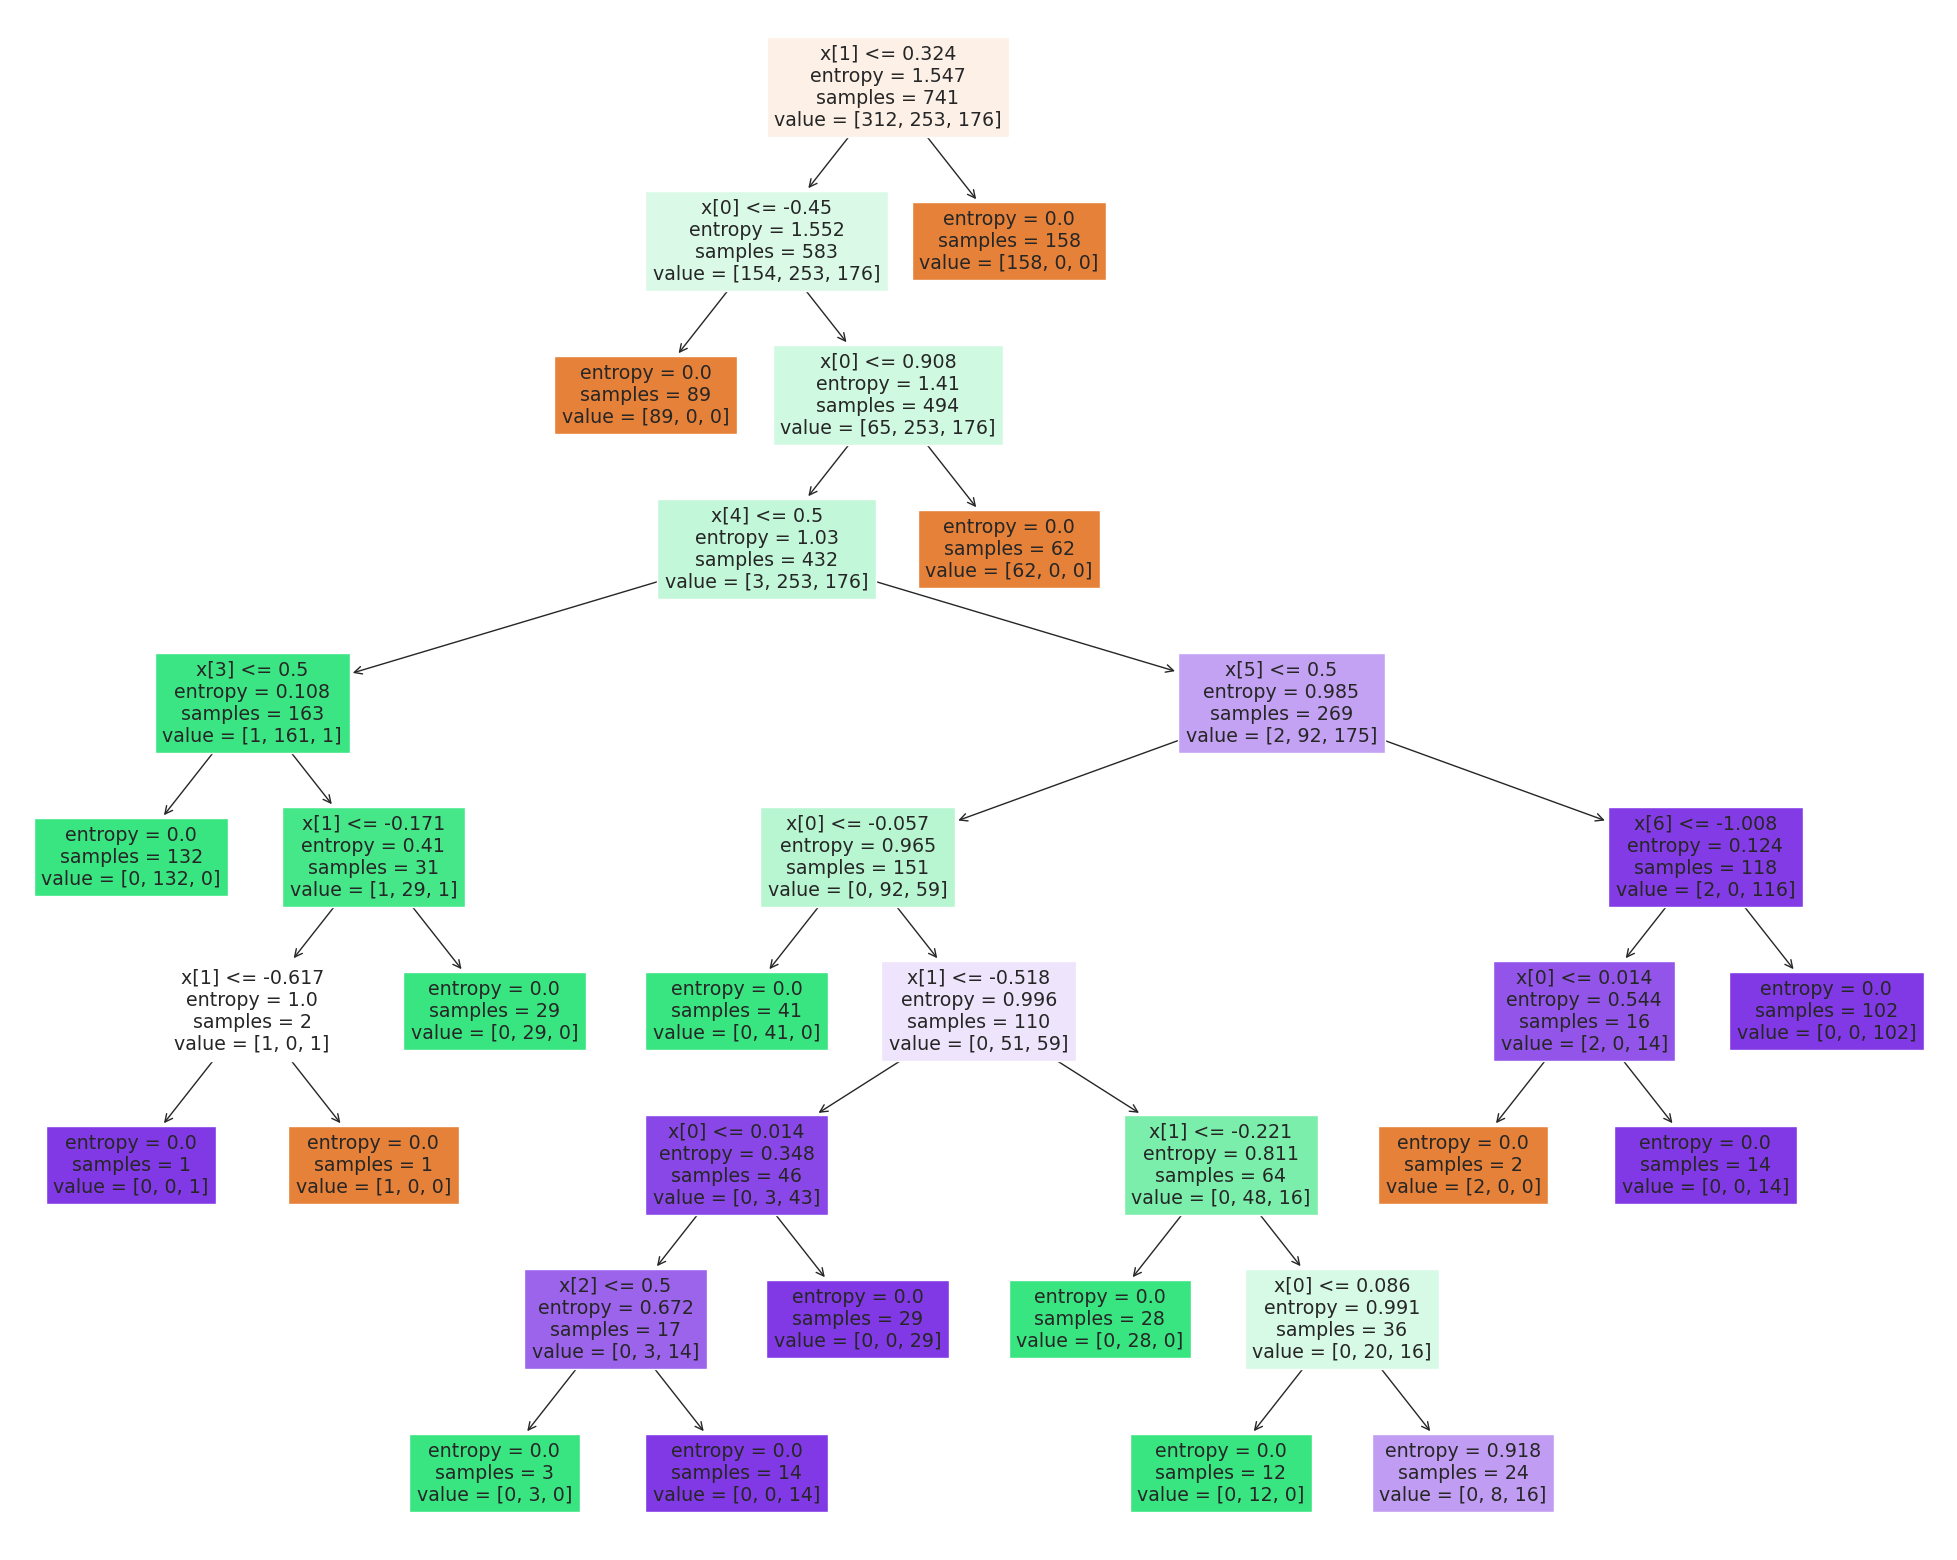

In [ ]:
#Model optimisation
DT_S1=DecisionTreeClassifier(criterion='entropy' ,max_depth=9)
DT_S1.fit(xtrain_S,ytrain_S)
ypred_S3=DT_S1.predict(xtest_S)
print("Accuracy is: ",accuracy_score(ytest_S,ypred_S3))
# Plotting the Tree
fig = plt.figure(figsize=(25,20))
figure3 = tree.plot_tree(DT_S1,filled=True)

Accuracy is:  0.9874213836477987


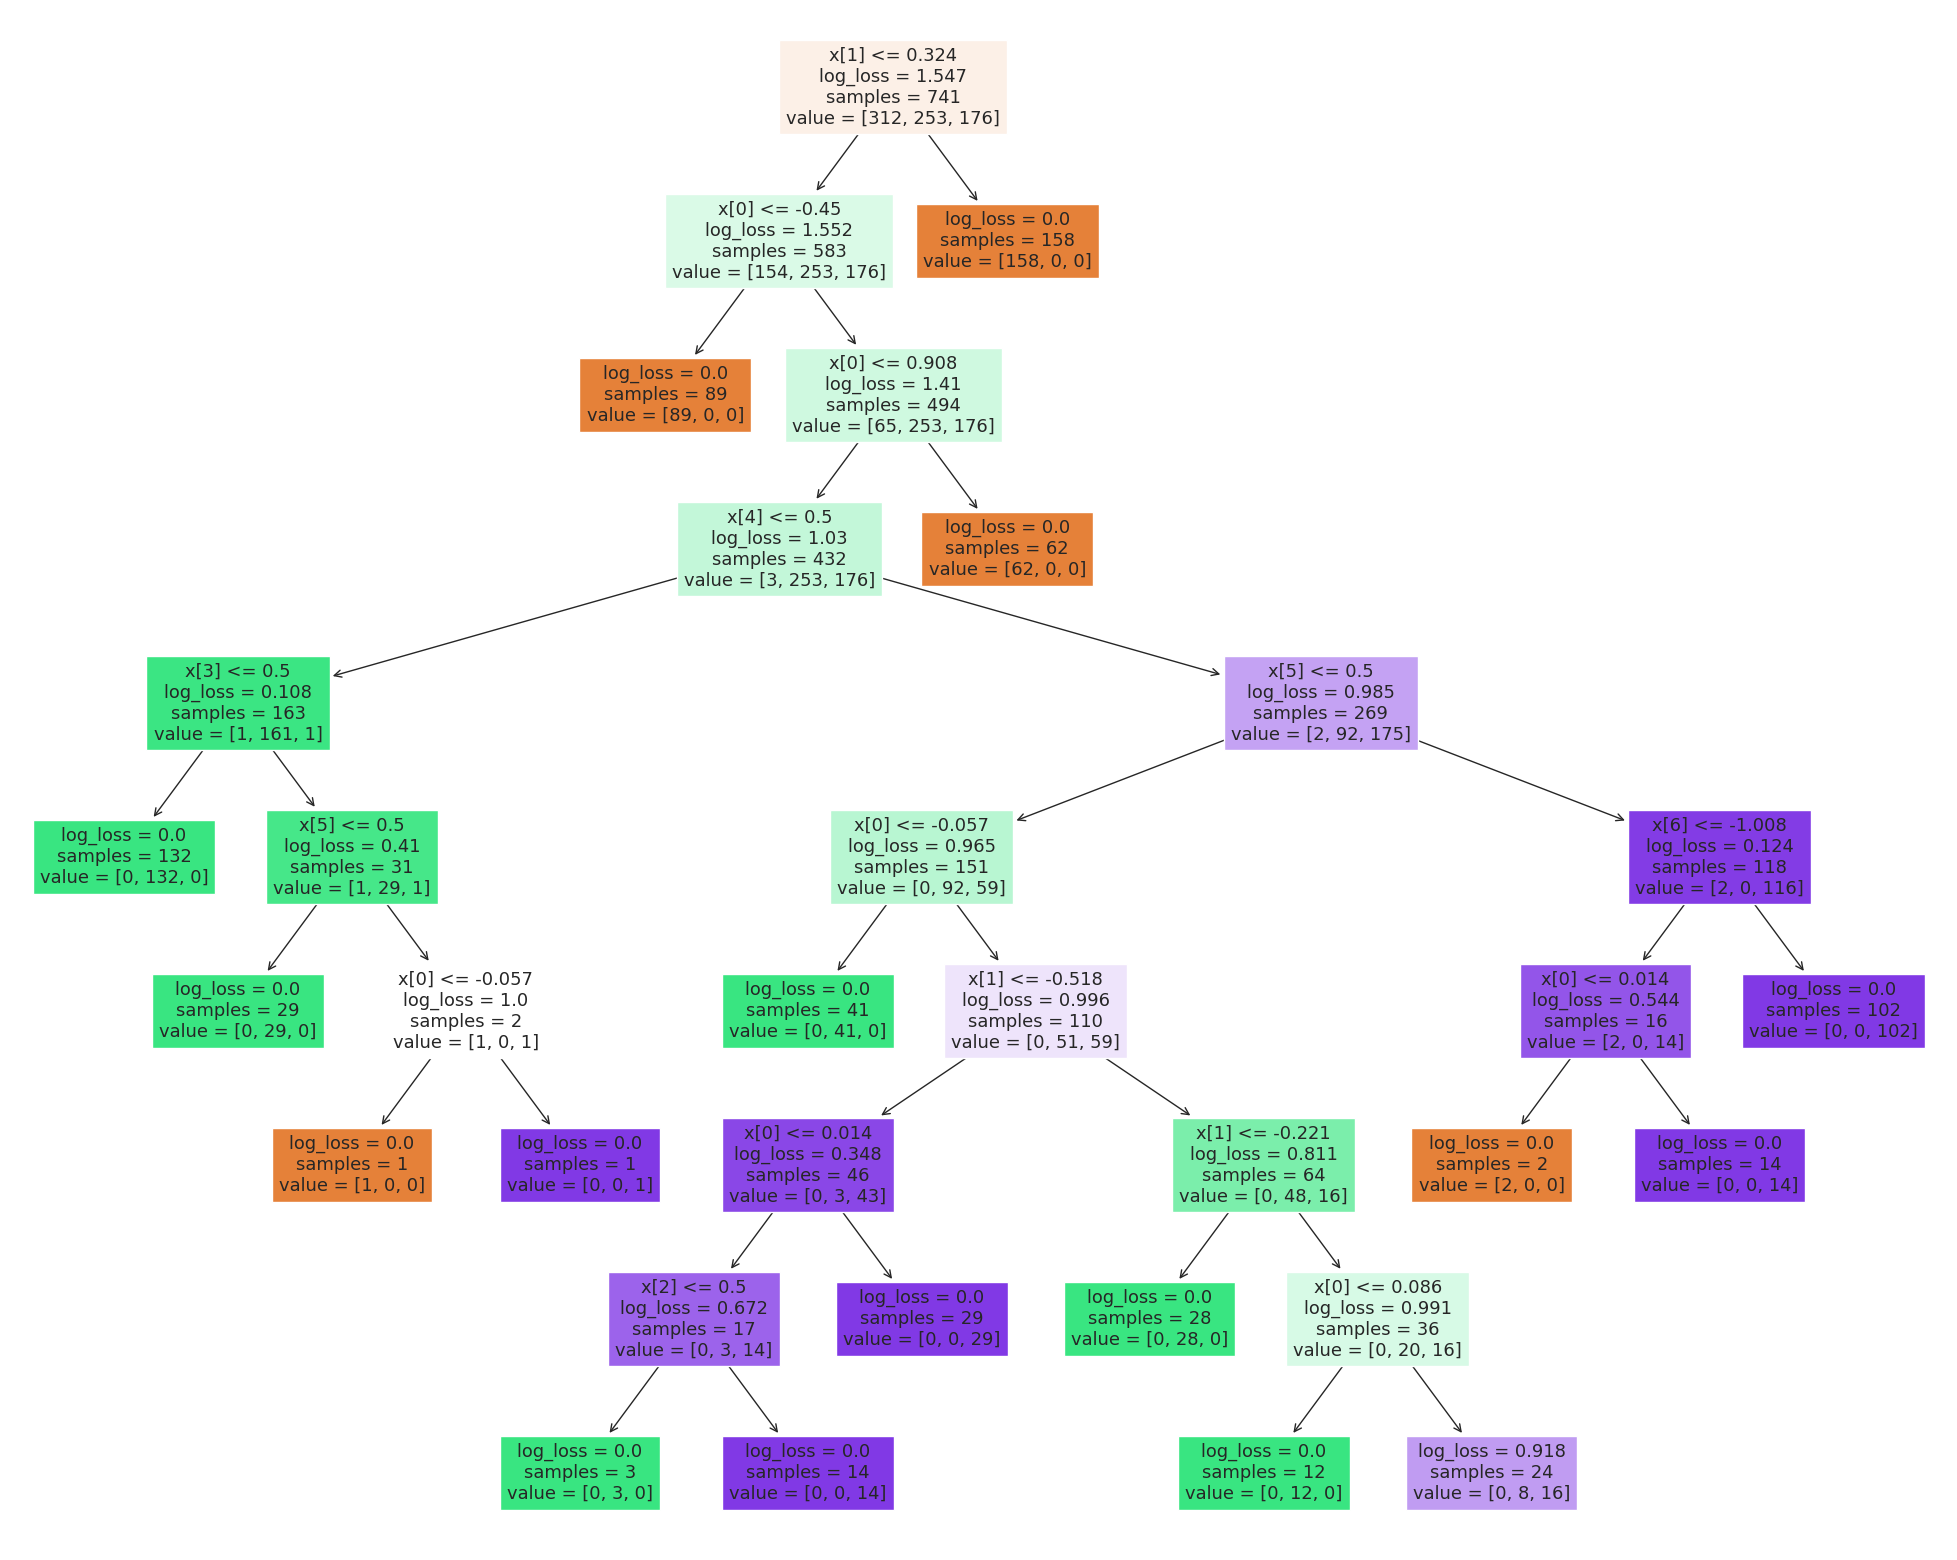

In [ ]:
#Model optimisation
DT_S2=DecisionTreeClassifier(criterion='log_loss' ,max_depth=9)
DT_S2.fit(xtrain_S,ytrain_S)
ypred_S4=DT_S2.predict(xtest_S)
print("Accuracy is: ",accuracy_score(ytest_S,ypred_S4))
# Plotting the Tree
fig = plt.figure(figsize=(25,20))
figure4 = tree.plot_tree(DT_S2,filled=True)

**OBSERVATION:** Naive Bayes is often preferred when dealing with high-dimensional data with few training examples, where its simplicity and speed make it an ideal choice. Decision Trees are often preferred when dealing with complex data structures, where the model's ability to handle both categorical and continuous data and its ease of interpretation make it an ideal choice. However, the choice between these algorithms also depends on the specific problem at hand, the size and structure of the dataset, and other factors such as the computational resources available.

